# 15 Scatter Plots

Great at showing correlation between multiple variables

In [5]:
# Import libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data cleaning
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# 15.1 Simple examples first

<Axes: xlabel='skill_count', ylabel='skill_pay'>

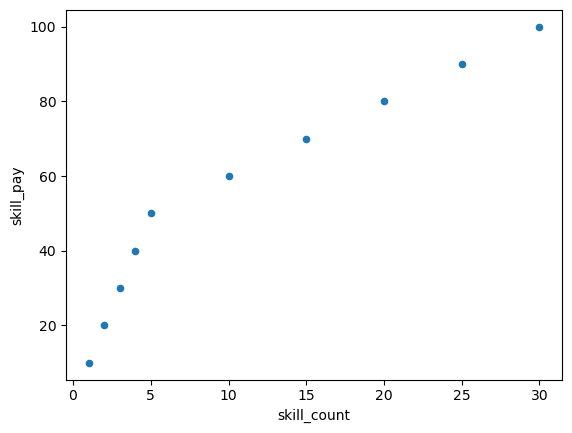

In [6]:
# create fake data dictionary

data = {
    "job_skills": ["python", "sql", "java", "c++", "c#", "javascript", "html", "css", "php", "ruby"],
    "skill_count": [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    "skill_pay": [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

# convert dict in df

df_example = pd.DataFrame(data)

# plotting

df_example.plot(kind="scatter", x="skill_count", y="skill_pay")

We need the following in a df format to be able to create a scatter plot:
- an index (with names or values) e.g. job_title, job_skills
- an aggregation of a specific value e.g. median_salary, max_salary, etc.
- another aggregation of a specific value e.g. count of job_postings, count of job_location in a specific city, etc. 

## 15.2 Simple example with actual data from the dataset

we're going to look at Data Analyst jobs, the skill_count and the median salary.

In [8]:
# create data analyst df

df_DA = df[df["job_title_short"] == "Data Analyst"]

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


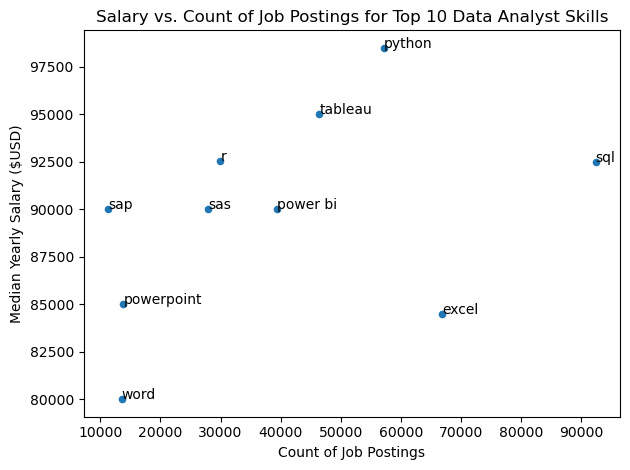

In [20]:
# df exploded

df_DA_exploded = df_DA.explode("job_skills")

# creating the specific data frame for the scatter plots

skill_stats = df_DA_exploded.groupby("job_skills").agg( # use the agg function as we are doing more than one operation after grouping 
    skill_count=("job_skills", "count"), # this is new. We are passing a tuple that contains 2 items: the column we want to analyse (e.g. job_skills) and the aggregation function we want (e.g. count) 
    median_salary=("salary_year_avg", "median")
)

# sorting the new df by skill counts, for the top 10 most popular skills 

skill_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(10)

# plotting

skill_stats.plot(kind="scatter", x="skill_count", y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Data Analyst Skills")
plt.tight_layout()


for i, txt in enumerate(skill_stats.index):
    print(i, txt)
    plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], txt)

plt.show()

# 15 Problems

# 2.15.1

- Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
- To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
- Annotate each point with the job title name.

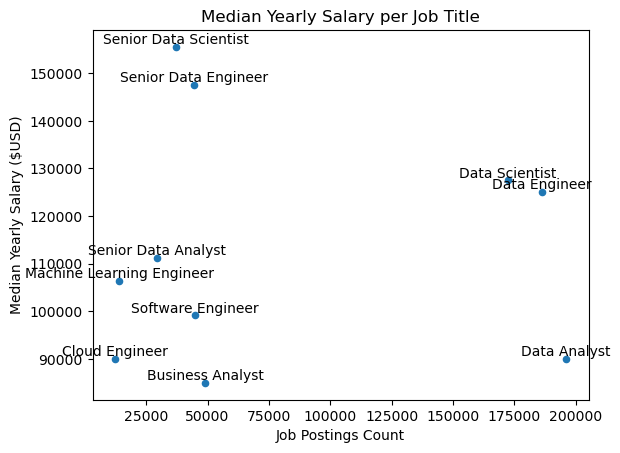

<Figure size 640x480 with 0 Axes>

In [29]:
# copy df

df_problem1 = df.copy()

# create new df for scatter plot

df_problem1_scatter = df_problem1.groupby("job_title_short").agg(
    median_salary=("salary_year_avg", "median"),
    job_count=("job_title_short", "count")
)

df_problem1_scatter = df_problem1_scatter.sort_values("job_count", ascending=False)

# plot
df_problem1_scatter.plot(kind="scatter", x="job_count", y="median_salary")
plt.xlabel("Job Postings Count")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Median Yearly Salary per Job Title")

# adding labels
for i in range(len(df_problem1_scatter)):
    job_count=df_problem1_scatter["job_count"].iloc[i]
    median_salary=df_problem1_scatter["median_salary"].iloc[i]
    job_title=df_problem1_scatter.index[i]
    plt.text(job_count, median_salary, job_title, ha="center", va="bottom")

# clean layout
plt.show()
plt.tight_layout()

## 2.15.2

Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

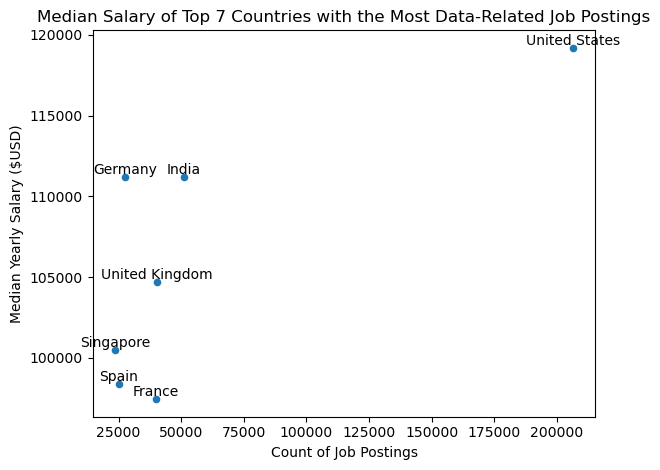

In [ ]:
# df copy

df_problem2 = df.copy()

# creating df for scatter plot

df_problem2_scatter = df_problem2.groupby("job_country").agg(
    median_salary=("salary_year_avg", "median"),
    job_count=("job_title_short", "count")
)

df_problem2_scatter = df_problem2_scatter.sort_values("job_count", ascending=False).head(7)

# create plot

df_problem2_scatter.plot(kind="scatter", x="job_count", y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Median Salary of Top 7 Countries with the Most Data-Related Job Postings")

for i in range(len(df_problem2_scatter)):
    job_count=df_problem2_scatter["job_count"].iloc[i]
    median_salary=df_problem2_scatter["median_salary"].iloc[i]
    job_country=df_problem2_scatter.index[i]
    plt.text(job_count, median_salary, job_country, ha="center", va="bottom")

plt.show
plt.tight_layout()
